In [1]:
import pandas as pd

from pycaret.classification import *


In [2]:
df = pd.read_csv('AdultIncome.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Drop columns

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df1 = df.drop(['workclass','education','occupation','capital-gain', 'capital-loss','native-country'],axis=1)

In [9]:
df1

,age,fnlwgt,education-num,marital-status,relationship,race,sex,hours-per-week,income
0,39,77516,13,Never-married,Not-in-family,White,Male,40,<=50K
1,50,83311,13,Married-civ-spouse,Husband,White,Male,13,<=50K
2,38,215646,9,Divorced,Not-in-family,White,Male,40,<=50K
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,40,<=50K
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,Wife,White,Female,38,<=50K
32557,40,154374,9,Married-civ-spouse,Husband,White,Male,40,>50K
32558,58,151910,9,Widowed,Unmarried,White,Female,40,<=50K
32559,22,201490,9,Never-married,Own-child,White,Male,20,<=50K


In [10]:
df1.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   hours-per-week  32561 non-null  int64 
 8   income          32561 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


### Setup the Experiment

In [12]:
exp = setup(data=df1, target= 'income', session_id=0, train_size=0.7, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,"<=50K: 0, >50K: 1"
3,Original Data,"(32561, 9)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.831900,0.883600,0.495600,0.719300,0.586500,0.485500
1,Extreme Gradient Boosting,0.831300,0.883200,0.475000,0.730600,0.575400,0.476000
2,Ada Boost Classifier,0.831000,0.882600,0.548100,0.686500,0.609400,0.503300
3,CatBoost Classifier,0.829600,0.880600,0.552600,0.680200,0.609700,0.502200
4,Light Gradient Boosting Machine,0.828700,0.880800,0.556200,0.675400,0.610000,0.501500
5,Logistic Regression,0.824700,0.877400,0.511500,0.681800,0.584300,0.476000
6,Ridge Classifier,0.824500,0.000000,0.448200,0.717800,0.551300,0.449400
7,Linear Discriminant Analysis,0.823900,0.873500,0.494500,0.687800,0.574900,0.467600
8,SVM - Linear Kernel,0.821600,0.000000,0.475000,0.689700,0.562100,0.454800
9,K Neighbors Classifier,0.808900,0.827600,0.547900,0.616700,0.580100,0.456900


### Logistic Regression Classifier Model

In [14]:
lrmodel = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8102,0.8628,0.4948,0.6355,0.5564,0.4380
1,0.8208,0.8685,0.4792,0.6815,0.5627,0.4543
2,0.8271,0.8703,0.5091,0.6926,0.5868,0.4807
3,0.8183,0.8812,0.5221,0.6547,0.5809,0.4668
4,0.8357,0.8779,0.5339,0.7118,0.6101,0.5087
5,0.8238,0.8846,0.5130,0.6770,0.5837,0.4747
6,0.8382,0.8926,0.5469,0.7143,0.6195,0.5190
7,0.8389,0.8967,0.5234,0.7309,0.6100,0.5120
8,0.8238,0.8759,0.4974,0.6846,0.5762,0.4685
9,0.8100,0.8638,0.4948,0.6355,0.5564,0.4379


In [15]:
print(lrmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


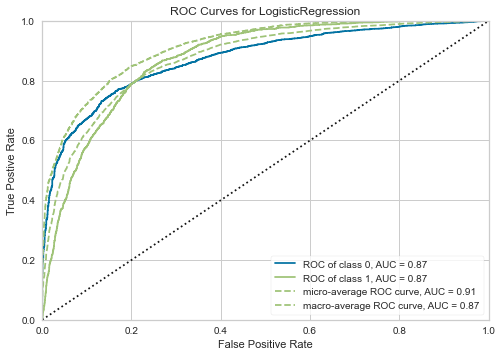

In [16]:
plot_model(lrmodel)

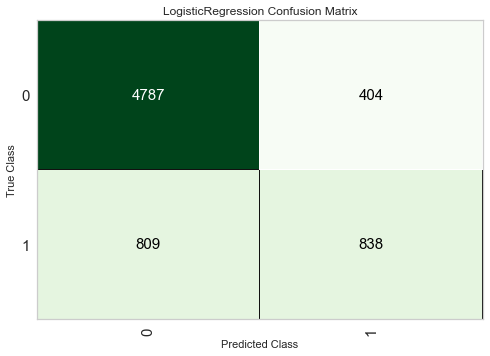

In [17]:
plot_model(lrmodel, plot = 'confusion_matrix')

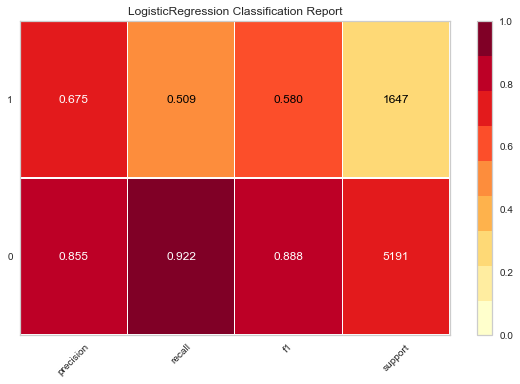

In [18]:
plot_model(lrmodel, plot = 'class_report')

In [19]:
evaluate_model(lrmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Prediction

In [20]:
predict_model(lrmodel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8226,0.8735,0.5088,0.6747,0.5801,0.4705


,age,fnlwgt,hours-per-week,education-num_1,education-num_10,education-num_11,education-num_12,education-num_13,education-num_14,education-num_15,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,income,Label,Score
0,-1.362269,0.160046,0.774468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0203
1,-1.288956,-1.180060,-0.845327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.0145
2,-0.482518,-1.417704,-0.035429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.5513
3,-0.189267,-0.041539,-0.521368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.0064
4,0.177296,-0.172086,0.369519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.4706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,-1.288956,1.782620,0.612489,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.3592
6834,0.323921,0.568390,4.742967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.6894
6835,1.350297,-0.008587,-0.035429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0184
6836,-1.435581,0.261867,-0.197409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0080


### Load test data and predict

In [27]:
testdata = pd.read_csv("testincome.csv")

In [28]:
testdata

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,Private,77500,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2200,0,40,United-States
1,39,Private,77500,Bachelors,13,Married-civ-spouse,Adm-clerical,Not-in-family,White,Male,2200,0,40,United-States


In [29]:
test1 = testdata.drop(['workclass','education','occupation','capital-gain', 'capital-loss','native-country'],axis=1)

In [30]:
test1

,age,fnlwgt,education-num,marital-status,relationship,race,sex,hours-per-week
0,39,77500,13,Never-married,Not-in-family,White,Male,40
1,39,77500,13,Married-civ-spouse,Not-in-family,White,Male,40


In [31]:
prediction = predict_model(lrmodel, data=test1)

In [32]:
prediction

,age,fnlwgt,education-num,marital-status,relationship,race,sex,hours-per-week,Label,Score
0,39,77500,13,Never-married,Not-in-family,White,Male,40,0,0.1675
1,39,77500,13,Married-civ-spouse,Not-in-family,White,Male,40,1,0.6415
